<h1 style="text-align: center"> Timex & Verb Associations in Biblical Hebrew</h1>
<h3 style="text-align: center">Cody Kingham, MA Biblical Studies & Digital Humanities, VU Amsterdam</h3>
<div>
<img src="../images/ETCBC.png" height="400" width="400">
<img src="../images/VU_theology.png" height="400" width="400">
</div>

<hr>

## Hypothesis
Certain time expressions ("timexes") associate, positively and negatively, with certain verb forms in Biblical Hebrew. 

## Motivation
The association of time expressions with certain verbs have the potential to inform us about the semantic content of the elusive Hebrew verbal form.

## Methodology

Note that the terms timex (time expression) and time phrases will be used interchangably throughout this notebook.

This notebook proceeds in two steps: data analysis and inferential analysis.

#### 1. Descriptive Analysis
This entails describing the data in the HB for **A)** time phrases (i.e. a timex) and **B)** tenses in Biblical Hebrew. This is done through simple counts and visualizations that help get a sense of the data. What kinds of timexes are there in the HB? What kinds of groups can be observed amongst them? How are they distributed in terms of genre and clauses? Likewise, what are the occurrence statistics for all predicative verbs in the HB? How are they distributed? 

#### 2. Inferential Analysis
The second step entails comparing the timexes with the tenses found in their enclosing clause to see if there are any statistically significant associations. For this step, the statistical method of χ^2 can be used. The analysis will consider additional complicating factors such as discourse structure, and the potentially complex interactions between timexes and other semantic entities (including the verb forms). 

## Theory
Theories on the semantic content of the Hebrew verb range from tense/aspect theories (e.g. Cook 2012, Joosten 2012) to discourse theories that stress the absence of inherent tense/aspect (Schneider YEAR; Talstra YEAR; Kalkman 2014
<br><span style="color: red">[bibliographical information needs to be corrected and checked, 22-10-17]</span>. 

This work proceeds from a theory neutral perspective. It adopts no position with regard to the debate over tense/aspect/discourse function, but it does seek to test those theories against the data. In order to test tense/aspect theories, this notebook seeks to see whether there are any associations between semantic carriers of time/aspect (time phrases) and verb tenses.

## Background
There has only been minimal research on the combination of verb tenses with time expressions in Biblical Hebrew. This is typically limited to select time phrases in studies on verbal tense (e.g. עתה, אז, עוד. cf. Joosten 2012; Cook 2012; Goldfaijn 1998; but see the helpful work of Van der Merwe 1997).

By comparison, there have been several pieces published on the association between tense and time phrases in English (Levickij and Romanova 1997; Harkness 1989). Those studies provide some helpful methodological reflection on the complexity of correlating time phrases to tenses. 

Comrie's 1985 study provides guidance on the complex interactions between the verb and the timex in language:
> Although collocation of tenses with time adverbials can be an important tool in investigating the meaning of tenses, it should again be emphasized that this tool cannot be applied mechanically, since the intervention of other factors may upset any simple association between tense and time adverbial.
<br>...<br>
> When one takes into account the interaction of tense with other facets of the syntax of a language...one can find a wide range of examples where there is apparent conflict between the time reference of a tense and a co-occurring adverbial. Thus in Portuguese...it is possible to have sentences like quando você chegar, eu já saí 'when you arrive, I will already have left' (Comrie 1985, 30, 31)

Comrie also provides some interesting examples in English of seeming "contradictions" between a supposed tense and a time adverbial, namely with the perfect tense. These kinds of complicating factors must be kept in mind.


## Limitations
This study cannot fully explore the problem of timex taxonomy, nor can it account for all of the potential discourse factors that certainly complicate certain associations. Additional problems for further exploration can only be described.

<hr>

In [28]:
# data import
timexes <- read.csv('../data/time_phrases.csv')
verbs <- read.csv('../data/verbs.csv')
clauses <- read.csv('../data/all_clauses.csv')

<hr>

# 1.1. Data Description: Time Phrases

The purpose of this section is to describe the the time-function phrases as they are encoded in the ETCBC's BHSA. The data shown below will illustrate that:
1. Time phrase expressions in the HB are distributed similar to lexemes. The top ~50 time phrases occur often while there are many "*hapax legomena*."
2. Time phrases occur fairly regularly throughout the HB with typically between 3% and 6% (IQR) of clauses in a book containing a time phrase.
3. The adverb, preposition, and substantive play a large role in time phrase's internal structure.

## 1.1.1. Time Phrase Diversity

As seen in this section, time expressions in the HB are as diverse as lexemes in corpus.

In order to count timexes, we access their surface forms in the `phrase.trans` column. They are then counted below.

In [26]:
tp.surfaces <- as.data.frame(table(timexes$phrase.trans))

colnames(tp.surfaces) <- c('surface','occurrence')

length(tp.surfaces$surface)

[1] 947

**There are `947` surface forms represented in the sample.** Below is the top 50 time phrase surface forms:

In [27]:
head(tp.surfaces[order(tp.surfaces$occurrence, decreasing=T),], 50) # ordered, head w/ top 50

,surface,occurrence
75,<TH,342
318,B H JWM H HW>,202
615,H JWM,189
720,L <WLM,101
373,B JWM,88
676,KL H JWM,86
267,B H BQR,78
106,>XR,67
140,>Z,64
34,<D H JWM H ZH,63


The occurrences of time phrase surface forms show **a wide range between the minimum occurrence value (1) and the maximum value (342)**:

In [315]:
summary(tp.surfaces$occurrence) # summary of occurrence counts

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    3.92    2.00  342.00 

As the histogram below demonstrates, **the corpus contains a few (~50) surface forms which are strongly represented while many are weakly represented.** 

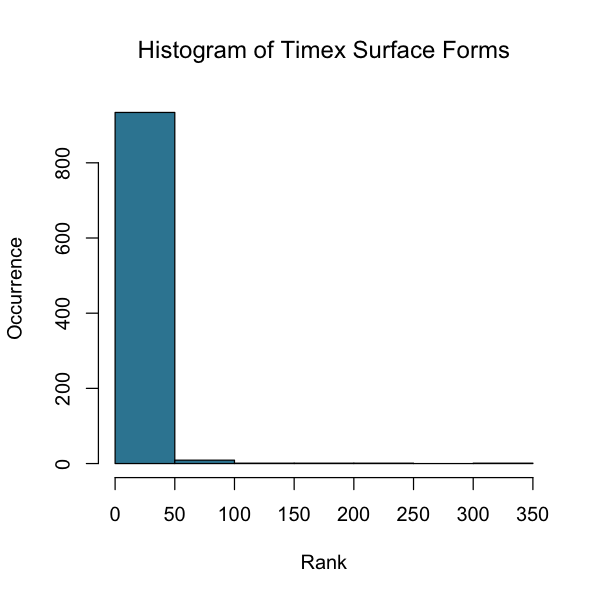

In [328]:
options(repr.plot.width=5, repr.plot.height=5) # adjust plot sizes
pretty_blue <- '#3686A1' # color is used throughout this nb

hist(tp.surfaces$occurrence,
     main='Histogram of Timex Surface Forms',
     ylab='Occurrence',
     xlab='Rank',
     col=pretty_blue
    )

This distribution resembles **Zipf's law**, which applies to lexeme frequencies. The plot below illustrates this for time phrase surface forms.

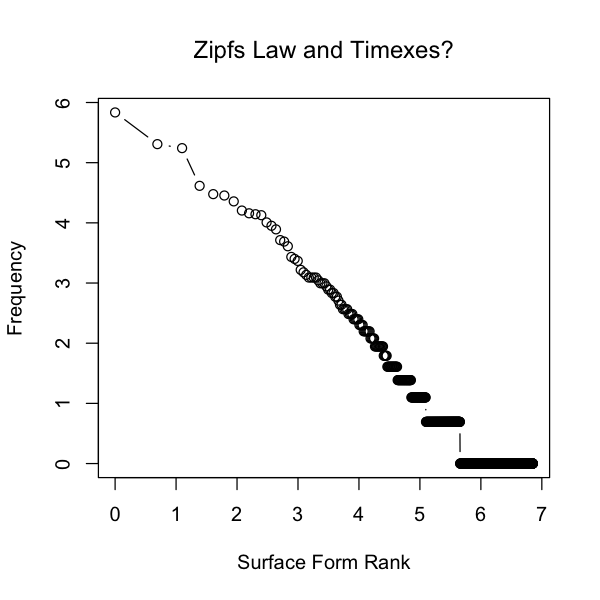

In [329]:
# plot time phrase surface form occurrences
plot(x=log(1:nrow(tp.surfaces)), # apply log transformations
     y=log(sort(tp.surfaces$occurrence, decreasing=T)), # sort
     main="Zipfs Law and Timexes?",
     type='b', # add lines to plot
     ylab='Frequency',
     xlab='Surface Form Rank'
    )

Zipf's law anticipates that a lexeme's frequency is inversely proportional to its rank in a corpus (Levshina 2015, 62-63). The plot shows something similar happening.

**70% of timex surface forms occur only once:**

In [330]:
sum(tp.surfaces$occurrence == 1) / length(tp.surfaces$occurrence) # get proportion of hapax

[1] 0.6979937

Thus, **the surface forms of a time phrase are very diverse.**

## 1.1.2. Time Phrase Distribution throughout the HB

Are time phrases a meaningful part of the language reflected in the Hebrew Bible, or are they restricted to certain portions or books? 

In this section, two units of distribution are calculated: **per chapter and per book**.

### Distribution by Chapter

The `clauses` dataset contains a simple binary value, `1` or `2` for presence/absence of a time phrase, respectively. The dataset represents all clauses in the HB. We use all clauses in order to also count those chapters that do not contain a time phrase at all (these would otherwise be omitted if we used the `timex` dataset).

First the number of clauses in the `clauses` dataset:

In [331]:
nrow(clauses)

[1] 86808

There are 86808 Hebrew clauses in the HB. 

Now count the presence of time phrases by chapter. First make a new column in the `clauses` dataset called `book.chapter`, which is a simple concatenation of book & chapter values for each row. Second, use a table to count which clauses has a timex (via `has.timex`) and count it by `book.chapter`. 

In [332]:
clauses$book.chapter <- paste(clauses$book, clauses$chapter, sep='.') # create a book.chapter column

tp.chapter <- as.data.frame(table(clauses$book.chapter, clauses$has.timex)) # make the counts

colnames(tp.chapter) <- c('book.chapter', 'has.timex', 'counts') # name cols

# separate True counts for has.timex
# doing it this way ensures chapters with null counts are included
tp.chapter <- tp.chapter[tp.chapter$has.timex == 1,]

cat('\nsample: ') # clean "print"
head(tp.chapter,1 )# show example


cat('\nsummary: ')
summary(tp.chapter$counts) # get summary


sample: 

book.chapter,has.timex,counts
1_Chronicles.1,1,1



summary: 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   4.147   6.000  27.000 

Based on the summary above, there is fairly wide range between the minimum and maximum timex counts (27).

The histogram below plots the chapter counts. It shows that the time phrases are not distributed normally throughout chapters.

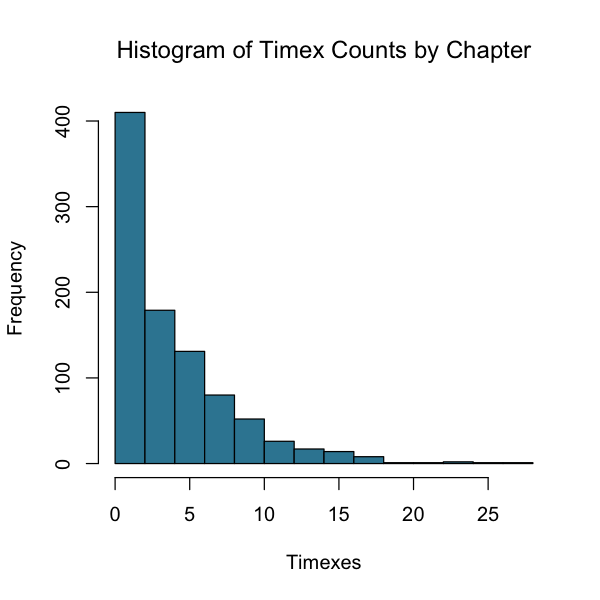

In [333]:
hist(tp.chapter$counts,
     main='Histogram of Timex Counts by Chapter',
     col=pretty_blue,
     xlab='Timexes'
    )

Since the data is not distributed normally, the Interquartile Range (IQR) is used as a measure of dispersion (following Levshina 2015, 49).

In [334]:
cat('IQR:', IQR(tp.chapter$counts)) # show IQR

IQR: 5

Combining the counts that fall between the first (1) and third quartiles (6), **we see that a majority (62%) of the chapters in the HB contain between 1 and 6 time phrases**:

In [335]:
# get proportion of chapters with 1-6 time phrases
sum(tp.chapter$counts %in% c(1:6)) / length(tp.chapter$counts) 

[1] 0.6153846

Thus, even though the distribution of time phrases by chapters is a non-normal, a modest proportion of the sample falls within the IQR. 

### Distribution by Book

Could the uneven distribution of timexes in chapters reflect a problem of division rather than a problem with the distribution? In other words **are timexes distributed more evenly between books than between chapters?**

Below, the same count is made, but this time with the `book` column that is already present in the dataset.

In [336]:
book.clauses <- as.data.frame(table(clauses$book)) # count clauses per book

tp.book <- as.data.frame(table(clauses$book, clauses$has.timex)) # count time phrases
colnames(tp.book) <- c('book', 'has.timex', 'counts') # name cols

tp.book <- tp.book[tp.book$has.timex == 1,] # separate True counts for has.timex

# normalize the timex counts
tp.book$counts <- tp.book$counts / book.clauses[,2] # divide by clause counts per book

In [337]:
summary(tp.book$counts) # get summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01096 0.03325 0.04624 0.04681 0.05657 0.11765 

The data exhibits a more normal distribution but with a slight positive skew. The density plot helps visualize the curve.

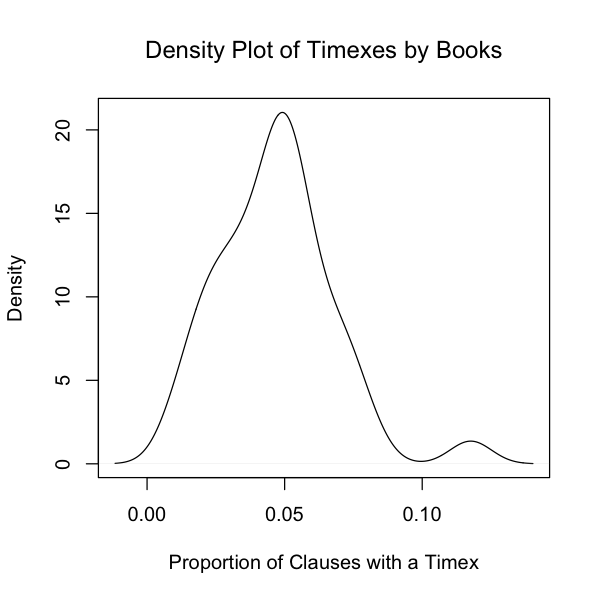

In [341]:
plot(density(tp.book$counts),
     main='Density Plot of Timexes by Books',
     xlab='Proportion of Clauses with a Timex'
    )

The normal distribution can also be seen with the Q-Q plot:

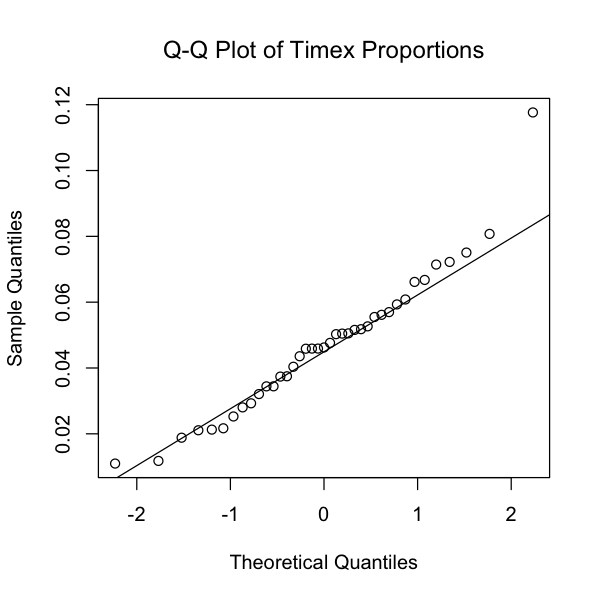

In [342]:
qqnorm(tp.book$counts, 
       main='Q-Q Plot of Timex Proportions'
      )
qqline(tp.book$counts)

The outlier is obtained by accessing the count which is significantly above the line, ~0.08:

In [343]:
cat('\nOutlier Book: ')
tp.book[tp.book$counts > 0.0808,]  # get outlier


Outlier Book: 

,book,has.timex,counts
33,Obadiah,1,0.1176471


**Obadiah is the outlier.** It contains a statistically higher proportion of time phrases. It is no surprise, as well, that Obadiah is the shortest book in the HB, which is probably the reason for its uniqueness.

*Interestingly, in the sample above, an outlier from an older version of my dataset alerted me to a problem. The Book of Daniel previously appeared with a high count ~0.11. It was then that I realized I had not excluded Aramaic from the dataset. When the adjustment was subsequently made, Daniel as an outlier disappeared. This demonstrates Levshina's point that outliers can signal problems with data collection (2015, 57).*

**Smaller numbers of time phrases are found in the following books:**

In [378]:
cat('\nBooks with Less Timexes: ')
tp.book[tp.book$counts < 0.03,]  # get outlier


Books with Less Timexes: 

,book,has.timex,counts
10,Ecclesiastes,1,0.02802803
13,Ezekiel,1,0.02168022
16,Habakkuk,1,0.01176471
21,Job,1,0.02108126
23,Jonah,1,0.02127660
28,Malachi,1,0.02527076
30,Nahum,1,0.02926829
34,Proverbs,1,0.01882058
37,Song_of_songs,1,0.01096491


Thus the prophetic and poetic books have slightly lower numbers of time phrases.

Finally, the stripchart below illustrates the fairly even distribution of time phrases throughout the corpus. Slight gaps appear where the poetic portions are in the corpus.

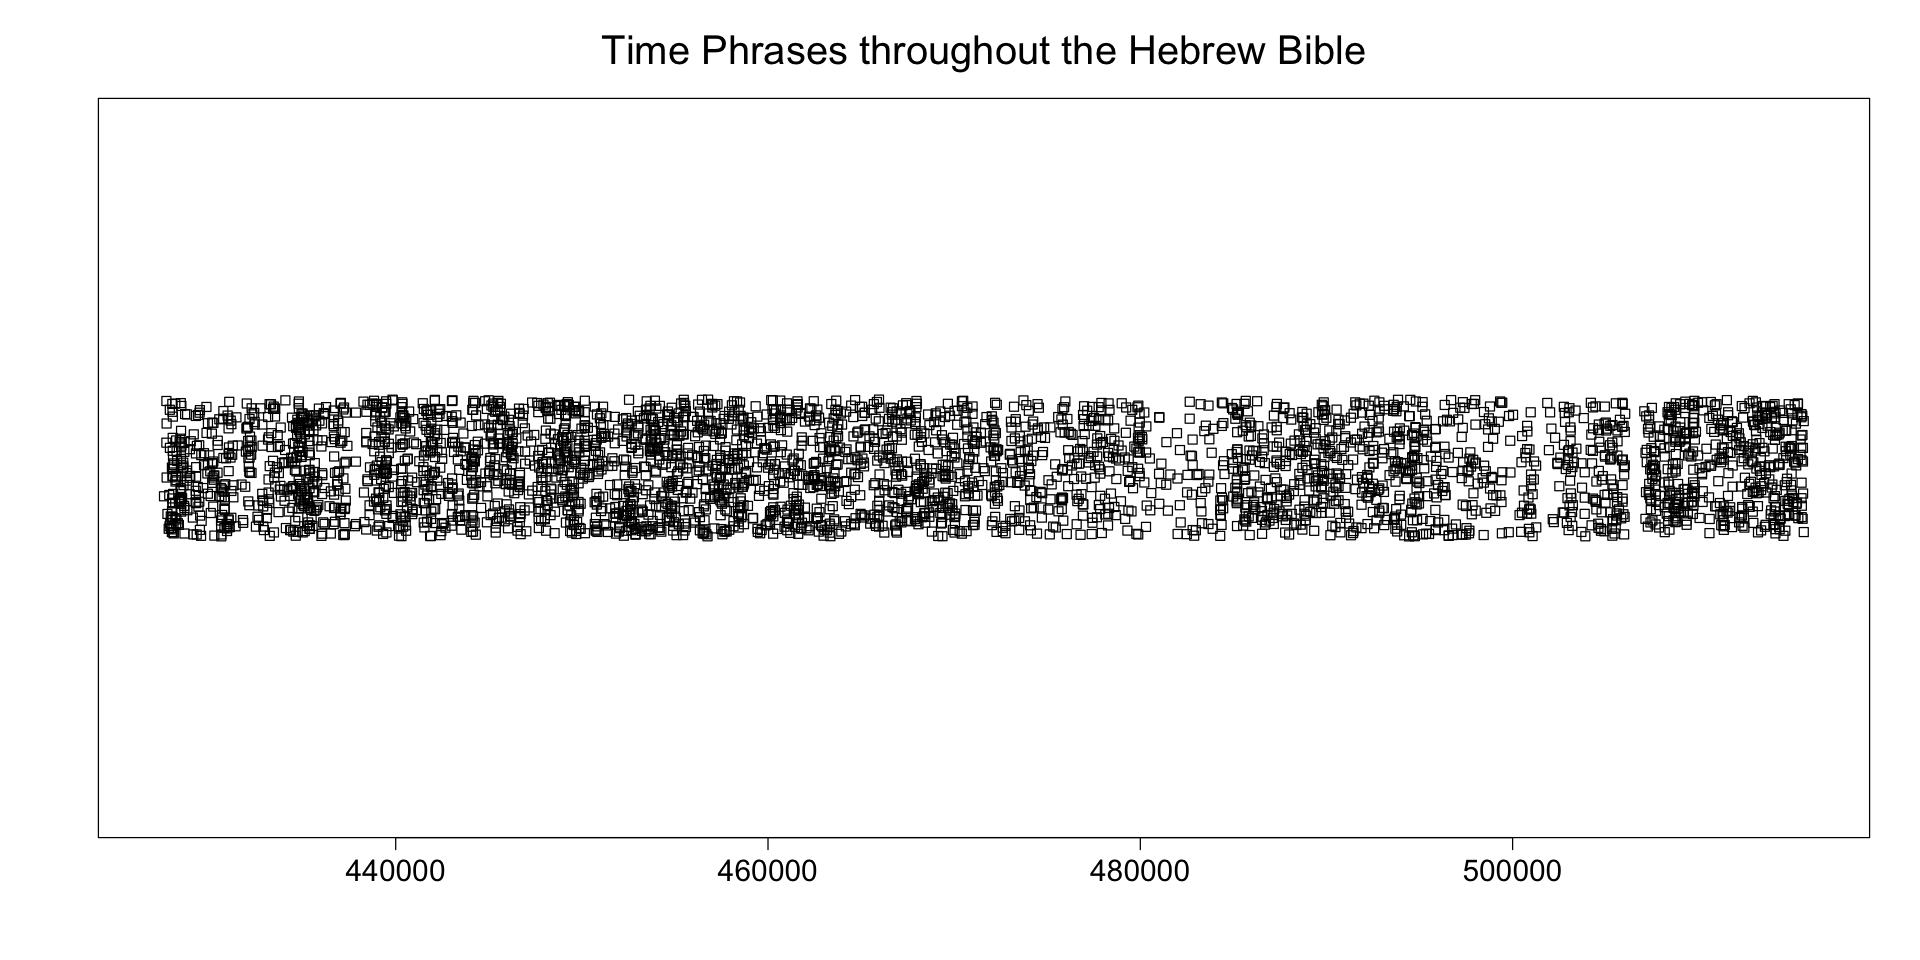

In [375]:
options(repr.plot.height=8, repr.plot.width=16) # size

stripchart(timexes$clause.n, 
           main = 'Time Phrases throughout the Hebrew Bible',
           method = 'jitter',
           cex.axis = 1.5,
           cex.main = 2,
           xlim = c(427553,515653) # clause node ranges from otype.tf
          )

Overall, though, the data demonstrates that time phrases are fairly evenly distributed throughout the Hebrew portions of the HB. Most chapters (62%) contain between 1 and 6 timexes. Most books exhibit between 0.01 - 0.06% (1st and 3rd quartiles) of clauses that also contain a time phrase. **It can be concluded, then, that time-function phrases play an important role in the language reflected in the corpus**. They are not functions that are relegated solely to certain genres or passages.

## 1.1.3. Internal Structure of a Timex

What is in a time phrase? The internal structure of the time phrase is not only important for understanding the phrases themselves, it is also crucial for grouping them for the inferential analysis on verb associations. And as demonstrated above, the diversity of the time phrase requires some kind of categorical grouping.

The phrase-internal structure is also key for understanding the semantic content of a time phrase. What does it mean for a time phrase to communicate "time"? What units of the language does a time phrase use to do so?

In this section, the phrase-dependent part of speech patterns are given and analyzed. **It is shown that the adverb, preposition, and substantive are crucial for understanding the phrase internal structure of a timex.**

### Attested Part of Speech Patterns

The part of speech patterns are accessed through the `pdp.pattern` column in the dataset.

As seen below, **there are 270 unique part of speech patterns within Hebrew time phrases.**

In [18]:
length(unique(timexes$pdp.pattern))

[1] 270

The top 20 part of speech patterns are now displayed.

In [134]:
tp.pdp <- as.data.frame(table(timexes$pdp.pattern)) # make a count of pdp patterns
colnames(tp.pdp) <- c('pdp.pattern', 'count') # col names
tp.pdp <- tp.pdp[order(tp.pdp$count, decreasing=T),] # order by count


top.tp.pdp <- head(tp.pdp, 20)

top.tp.pdp

,pdp.pattern,count
1,advb,584
110,prep-subs,460
58,prep-art-subs-art-prde,413
34,prep-art-subs,294
254,subs-subs,264
23,art-subs,214
171,prep-subs-subs,199
37,prep-art-subs-art-adjv,140
238,subs-art-subs,103
114,prep-subs-art-subs,86


And plotted...

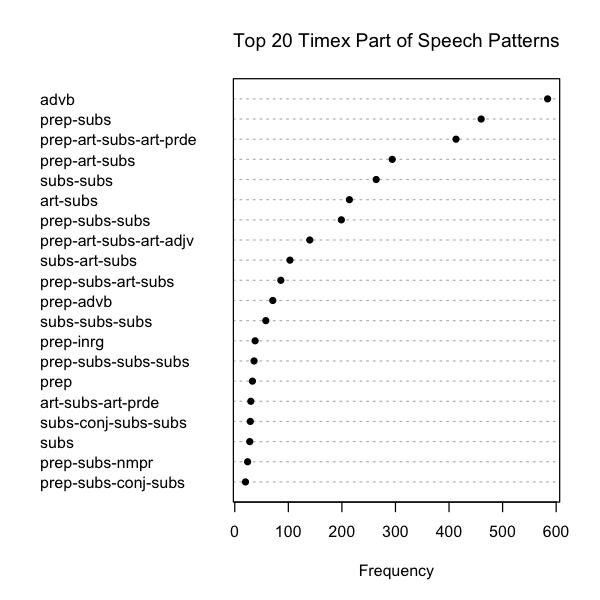

In [181]:
dotchart(rev(top.tp.pdp$count), # rev (reverse) puts highest at top
         rev(top.tp.pdp$pdp.pattern),
         main='Top 20 Timex Part of Speech Patterns',
         cex=.8, # font size
         xlab='Frequency',
         pch=16 # solid dots
        )

The data shows how important the adverb (`advb`), preposition (`prep`), and substantive (`subs`) are for the phrase-internal structure of the timex. The demonstrative pronoun (`prde`) also plays a role (e.g. `prep-art-subs-art-prde`).

Below the proportion of time phrases with an adverb, preposition, or substantive is calculated.

**20% of timexes have an adverb:**

In [311]:
tp.with.advb <- nrow(timexes[timexes$advbs != 'ø',]) / nrow(timexes)
tp.with.advb

[1] 0.201778

**61% of timexes have a preposition:**

In [379]:
tp.with.prep <- nrow(timexes[timexes$preps != 'ø',]) / nrow(timexes)
tp.with.prep

[1] 0.6085668

**79% of timexes have a substantive *(excluding nomen recta and adjectivals)*:**

In [380]:
tp.with.subs <- nrow(timexes[timexes$subs != 'ø',]) / nrow(timexes)
tp.with.subs

[1] 0.7920259

The top 20 lexemes for adverbs, prepositions, and substantives are given below in ETCBC transcription. These lexemes, and those not reflected in the top 20, provide the basis for the semantic classes which are described later in this study.

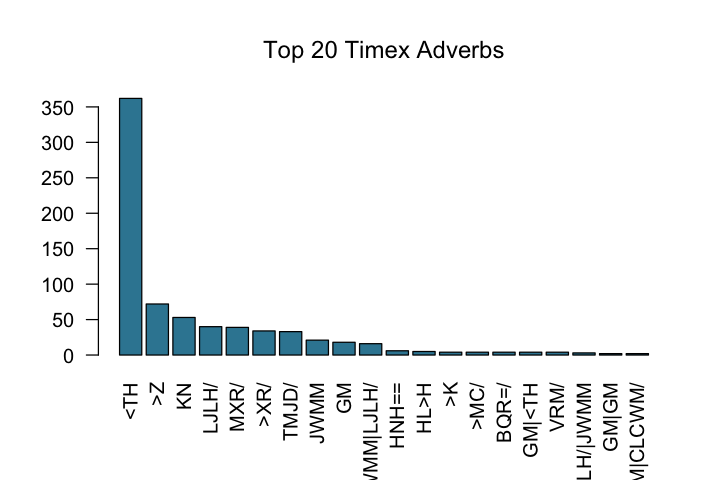

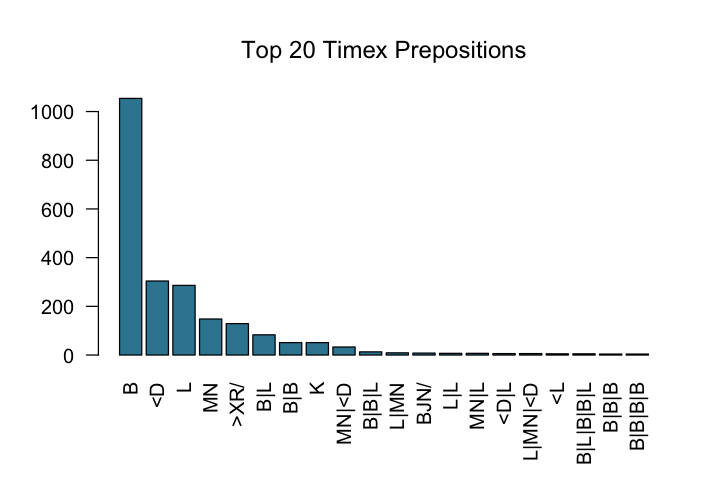

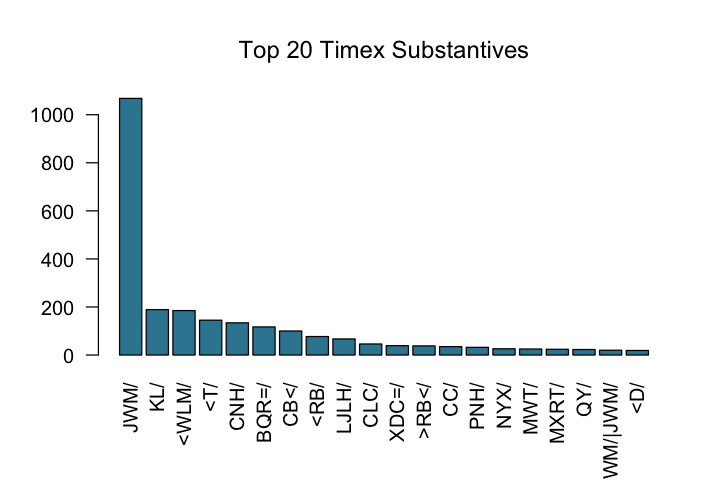

In [381]:
# plot top 20 lexes for preps, advbs, and subs 

options(repr.plot.width=6, repr.plot.height=4) # adjust plot sizes

# prepositions
tp.preps <- as.data.frame(table(timexes[timexes$preps != 'ø',]$preps)) # count
tp.preps <- tp.preps[order(tp.preps$Freq, decreasing=T),]  # order

# adverbs
tp.advbs <- as.data.frame(table(timexes[timexes$advbs != 'ø',]$advbs)) # count
tp.advbs <- tp.advbs[order(tp.advbs$Freq, decreasing=T),] # order

# substantives
tp.subs <- as.data.frame(table(timexes[timexes$subs != 'ø',]$subs)) # count
tp.subs <- tp.subs[order(tp.subs$Freq, decreasing=T),] # order

# plot them
barplot(head(tp.advbs$Freq, 20), 
        names.arg=head(tp.advbs$Var1, 20),
        main='Top 20 Timex Adverbs',
        col=pretty_blue,
        las=2
       )
barplot(head(tp.preps$Freq, 20), 
        names.arg=head(tp.preps$Var1, 20),
        main='Top 20 Timex Prepositions',
        col=pretty_blue,
        las=2
       )
barplot(head(tp.subs$Freq, 20), 
        names.arg=head(tp.subs$Var1, 20),
        main='Top 20 Timex Substantives',
        col=pretty_blue,
        las=2
       )

# Summary

This section has demonstrated the following. 

1. Time phrases are diverse in their surface forms. **This means that additional and meaningful grouping is required to make the comparisons between verbs in time-marked clauses and verbs in the rest of the clauses.**
2. Time phrases are distributed throughout the whole Hebrew Bible. **This means that time phrases are a meaningful part of the language reflected in the corpus as a whole.**
3. Time phrases are reliant on adverbs, prepositions, and substantives for their internal structure. **This means these constituent parts should play an important role in the classification and groupings of time phrases**.

# 1.2. Data Description: Verbs throughout the HB



<hr>

## N. Time Phrase Taxonomy



The issue of categorizing time phrases is crucial for testing the hypothesis of verb form association. It also presents  big challenges. As seen in the surface form investigation, time phrase expressions are nearly as diverse as lexemes.  

The hypothesis that certain timexes associate with certain tenses assumes that there is some kind of interaction between the semantic elements of the timex and the verb tense. Thus, to test the hypothesis, semantic grouping for the timexes is required. 

A working assumption of this study is that time expression conveys tense/aspect in a more transparent way than verb morphology. The meaning of morphological information is not self-evident as it is neither a concrete nor abstract entity; it is a purely grammatical phenomenon. Time phrases, on the other hand, contain clearer clues as to their time or aspect reference, such as adverbs, substantives, or prepositions. 

To what degree is it possible to categorize semantic data reflected in time phrases in a consistent way? Since Hebrew is a dead language and we have no access to native intuition, time phrase classifications should be based as much as possible on formal characteristics. This means examining the patterns expressed within the time phrases and establishing groups based on the presence of various elements.

The problem of circularity is never fully escaped. Modern human intuition has guided the encoding of the phrases as "time phrases"; and modern human intuition guides the selection of discrete features. The hope, then, is that the human element can be somewhat mitigated by the more explicit time/aspect senses communicated by the phrase-internal units.

### Method of Classifying Time Phrases

Grouping the time phrases is a big enough task to encompass a major research project. For the present purpose, only limited, hypothetical groupings can be assembled. Two key criteria are used to produce \*N categories of  time phrases:

* preposition and its semantic implication.
* adverb | substantive and its semantic implication

Consequently, these two types can respectively communicate two kinds of semantic data:

* aspectual data through the preposition (e.g. at, for, while, etc.)
* temporal data through the adverb/substantive (e.g. tomorrow, now, etc.)

When combined, the two form a unique classification of a phrase's temporal-aspectual semantic content. Those classifications will be used for the verb form measurements further below.

The classification requires the powerful tools that only Text-Fabric can offer. Thus the categories have been processed in [bhsa_data_generation.ipynb]('../data/bhsa_data_generation.ipynb'). For the semantic classification of the prepositions and adverbs/substantives, a manual method was used on the most attested patterns in consultation with the data tables shown above. Finally, the classifications are added using a template-based search in Text-Fabric (TF Search) to isolate the qualifying phrases.

Using the methods outlined above, **only a select group of \*N time phrases receive a classification.**

### Time Phrase Groups

*[Fill in information about the classes]*

In [23]:
tp.groups <- as.data.frame(table(timexes$timex.group))

tp.groups[order(tp.groups$Freq, decreasing=T),]

,Var1,Freq
56,internal.unit,676
64,ø,464
63,unit,404
33,deictic_present,344
55,internal.subunit,269
21,behind_to.duration,198
29,collection,168
28,behind_to.unit,129
62,subunit,123
27,behind_to.subunit,107


In [24]:
# playing around with the samples

table(droplevels(timexes[timexes$timex.group == 'behind_to.duration',]$verb.tense))


impf impv infc perf wayq weqt    ø 
 106    6   14   17    4   19   32 

In [26]:
# more play

(timexes[timexes$timex.group == 'behind_to.duration',])

,book,chapter,verse,clause.n,phrase.n,phrase.trans,preps,num.preps,subs,num.subs,⋯,advbs,num.advbs,pdp.pattern,domain,verb.lex,verb.tense,position.at.vb,position.at.cl,cl.dependency,timex.group
11,Genesis,3,22,427870,652447,L <WLM,L,1,<WLM/,1,⋯,ø,0,prep-subs,Q,XJH[,weqt,2,3,I,behind_to.duration
35,Genesis,6,3,428066,653065,L <WLM,L,1,<WLM/,1,⋯,ø,0,prep-subs,Q,DWN[,impf,2,5,I,behind_to.duration
80,Genesis,13,15,428633,654891,<D <WLM,<D,1,<WLM/,1,⋯,ø,0,prep-subs,Q,ø,ø,2,3,I,behind_to.duration
276,Exodus,3,15,433807,670254,L <WLM,L,1,<WLM/,1,⋯,ø,0,prep-subs,Q,ø,ø,2,3,I,behind_to.duration
332,Exodus,12,24,434827,673390,<D <WLM,<D,1,<WLM/,1,⋯,ø,0,prep-subs,Q,CMR[,weqt,2,6,I,behind_to.duration
355,Exodus,14,13,435061,674116,<D <WLM,<D,1,<WLM/,1,⋯,ø,0,prep-subs,Q,JSP[,impf,2,4,I,behind_to.duration
400,Exodus,19,9,435624,675810,L <WLM,L,1,<WLM/,1,⋯,ø,0,prep-subs,Q,>MN[,impf,2,4,I,behind_to.duration
411,Exodus,21,6,435795,676337,L <WLM,L,1,<WLM/,1,⋯,ø,0,prep-subs,Q,<BD[,weqt,2,3,I,behind_to.duration
448,Exodus,31,17,436870,679721,L <WLM,L,1,<WLM/,1,⋯,ø,0,prep-subs,Q,ø,ø,2,4,I,behind_to.duration
453,Exodus,32,13,436958,679956,L <WLM,L,1,<WLM/,1,⋯,ø,0,prep-subs,Q,NXL[,weqt,2,3,D,behind_to.duration
